<a href="https://colab.research.google.com/github/Yomunozs/Aprendizaje_Maquina/blob/main/Ejercicios_propuestos_en_clase/TAM_para_P_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

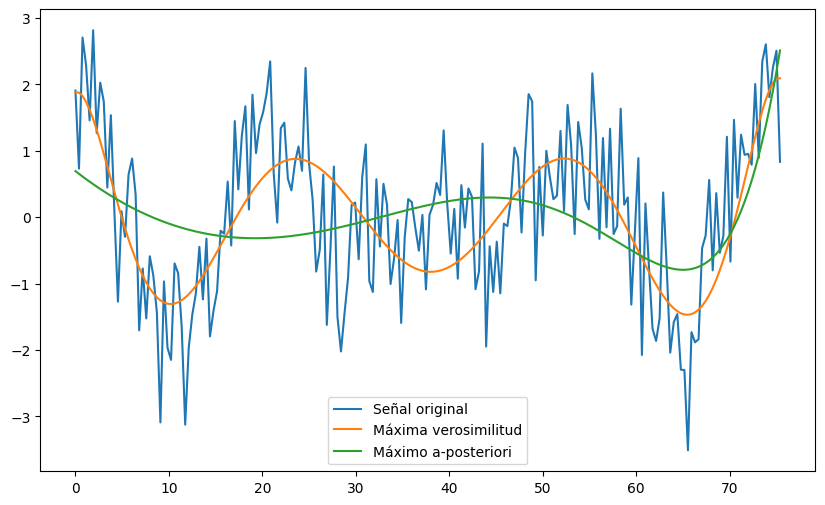

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, BayesianRidge

# Parámetros
Q = 9  # Orden del polinomio
sigma_w = 1  # Desviación estándar de la prior
SNRdB = 2  # Relación señal a ruido en dB
N_train = 500  # Número de datos de entrenamiento
N_test = 200  # Número de datos de prueba

# Generar datos
x_train = np.linspace(0, 24*np.pi, N_train)
x_test = np.linspace(0, 24*np.pi, N_test)
y_train = np.cos(x_train/3) + np.cos(x_train/4)
y_test = np.cos(x_test/3) + np.cos(x_test/4)

# Agregar ruido blanco gaussiano
noise_train = np.random.normal(0, 10**(-SNRdB/20), N_train)
noise_test = np.random.normal(0, 10**(-SNRdB/20), N_test)
y_train += noise_train
y_test += noise_test

# Crear mapeo polinomial
poly = PolynomialFeatures(Q)
X_train = poly.fit_transform(x_train.reshape(-1, 1))
X_test = poly.transform(x_test.reshape(-1, 1))

# Normalizar los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regresor de máxima verosimilitud
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

# Regresor de máximo a-posteriori
blr = BayesianRidge(alpha_1=sigma_w**2, lambda_1=sigma_w**2)
blr.fit(X_train, y_train)
y_pred_blr = blr.predict(X_test)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Señal original')
plt.plot(x_test, y_pred_mlr, label='Máxima verosimilitud')
plt.plot(x_test, y_pred_blr, label='Máximo a-posteriori')
plt.legend()
plt.show()


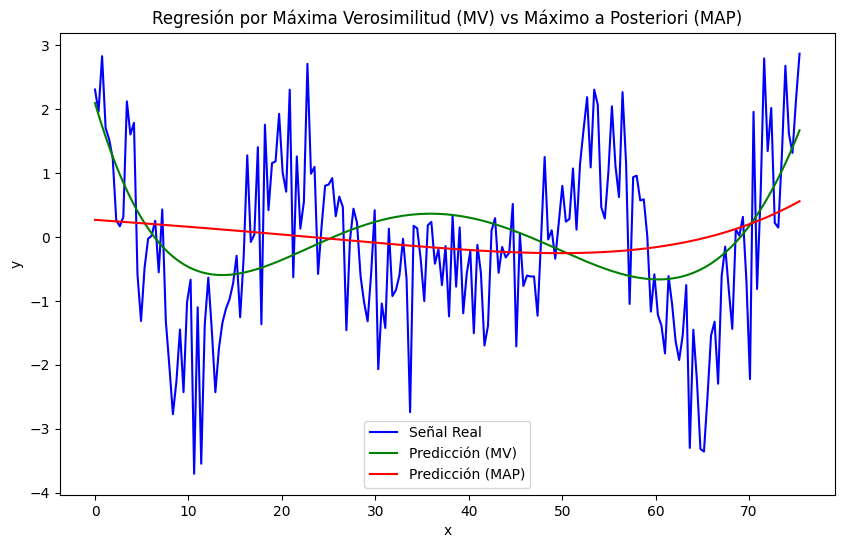

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

# Definición de la señal y el ruido
def signal(x):
    return np.cos(x / 3) + np.cos(x / 4)

def noise(x, snr_dB):
    signal_power = np.mean(signal(x) ** 2)
    noise_power = signal_power / (10 ** (snr_dB / 10))
    return np.random.normal(0, np.sqrt(noise_power), len(x))

# Generar datos de entrenamiento y prueba
np.random.seed(0)  # Para reproducibilidad
n_train = 500
n_test = 200
x_train = np.linspace(0, 24 * np.pi, n_train)
x_test = np.linspace(0, 24 * np.pi, n_test)
y_train = signal(x_train) + noise(x_train, 2)  # SNRdB = 2dB
y_test = signal(x_test) + noise(x_test, 2)

# Definir mapeo no lineal (polinomial de orden Q)
def phi(x, Q):
    return np.array([x ** q for q in range(1, Q + 1)]).T

# Normalizar características
scaler = MinMaxScaler()
phi_train = scaler.fit_transform(phi(x_train, Q=5))
phi_test = scaler.transform(phi(x_test, Q=5))

# Ajustar modelos de regresión
# Máxima Verosimilitud (Linear Regression)
ml_regressor = LinearRegression()
ml_regressor.fit(phi_train, y_train)

# Máximo a Posteriori (Ridge Regression con alpha=1)
map_regressor = Ridge(alpha=1)
map_regressor.fit(phi_train, y_train)

# Predecir con los modelos entrenados
y_pred_ml = ml_regressor.predict(phi_test)
y_pred_map = map_regressor.predict(phi_test)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Señal Real', color='blue')
plt.plot(x_test, y_pred_ml, label='Predicción (MV)', color='green')
plt.plot(x_test, y_pred_map, label='Predicción (MAP)', color='red')
plt.title('Regresión por Máxima Verosimilitud (MV) vs Máximo a Posteriori (MAP)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
